In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
###Importiing the packages

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
train_data.shape , train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

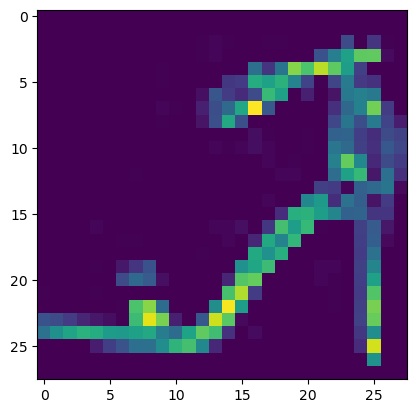

In [4]:
plt.imshow(train_data[8])

In [5]:
train_labels[8]

5

In [6]:
### This looks like the data is in numerical form , its better to convert them to human readable form that helps in better assess the data

In [7]:
class_names = ["T-shirt/top", "Trouser" , "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
len(class_names), class_names

(10,
 ['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'])

Text(0.5, 1.0, 'Coat')

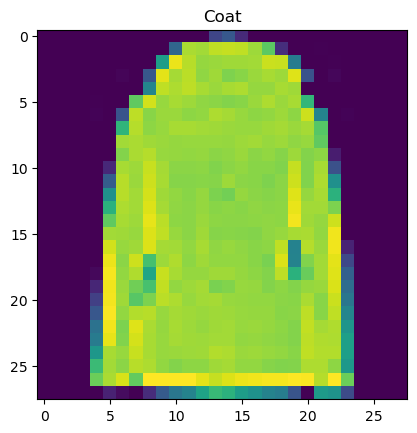

In [9]:
plt.imshow(train_data[2000])
plt.title(class_names[train_labels[2000]])

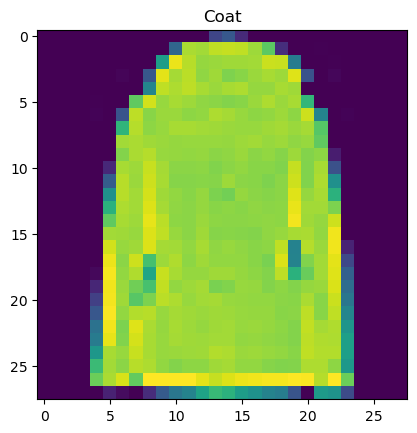

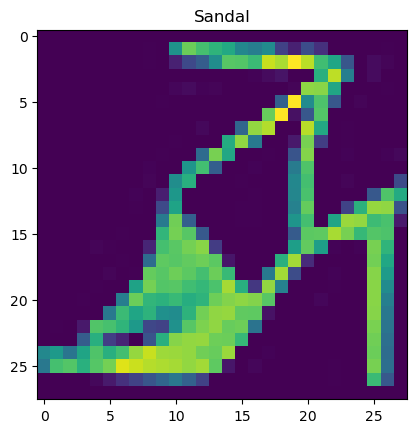

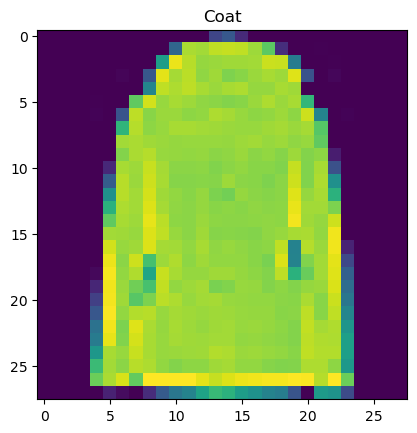

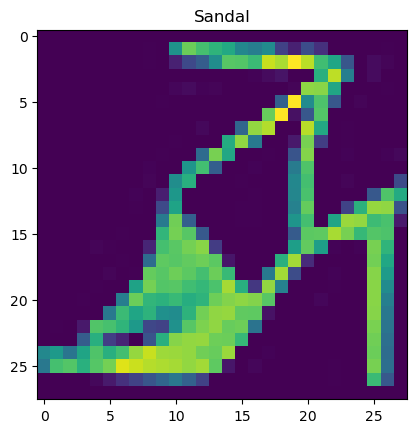

<Figure size 640x480 with 0 Axes>

In [10]:
### PLotting some random images
plt.imshow(train_data[2000]),plt.title(class_names[train_labels[2000]]),plt.show()
plt.imshow(train_data[20011]),plt.title(class_names[train_labels[20011]]),plt.show()
plt.imshow(train_data[2000]),plt.title(class_names[train_labels[2000]]),plt.show()
plt.imshow(train_data[20011]),plt.title(class_names[train_labels[20011]]),plt.show()
plt.tight_layout()

In [11]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_1.compile( loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])

In [12]:
history_1 = model_1.fit(train_data, train_labels, epochs = 10, validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 2.2788 - accuracy: 0.1393 - val_loss: 2.0978 - val_accuracy: 0.1804
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.9007 - accuracy: 0.2142 - val_loss: 1.7163 - val_accuracy: 0.2524
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.6683 - accuracy: 0.2713 - val_loss: 1.6219 - val_accuracy: 0.2828
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 1.6021 - accuracy: 0.2976 - val_loss: 1.5745 - val_accuracy: 0.3079
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 1.5677 - accuracy: 0.3155 - val_loss: 1.5514 - val_accuracy: 0.3167
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 1.5469 - accuracy: 0.3228 - val_loss: 1.5315 - val_accuracy: 0.3327
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.5321 - accuracy: 0.3245 - val_loss: 1.5282 - val_ac

In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [14]:
history_1.history

{'loss': [2.278822660446167,
  1.9006564617156982,
  1.6683417558670044,
  1.6020771265029907,
  1.5677047967910767,
  1.546923041343689,
  1.5320920944213867,
  1.5223143100738525,
  1.5147234201431274,
  1.5078377723693848],
 'accuracy': [0.13926666975021362,
  0.21423333883285522,
  0.27129998803138733,
  0.2976166605949402,
  0.31548333168029785,
  0.32284998893737793,
  0.3245166540145874,
  0.32260000705718994,
  0.326116681098938,
  0.3255166709423065],
 'val_loss': [2.097827672958374,
  1.716279149055481,
  1.6218708753585815,
  1.574463129043579,
  1.5513719320297241,
  1.531498908996582,
  1.5281944274902344,
  1.5224335193634033,
  1.5051994323730469,
  1.50640070438385],
 'val_accuracy': [0.18039999902248383,
  0.2524000108242035,
  0.28279998898506165,
  0.30790001153945923,
  0.3167000114917755,
  0.3327000141143799,
  0.3440999984741211,
  0.31279999017715454,
  0.3370000123977661,
  0.32429999113082886]}

<Axes: title={'center': 'learning curves of model_1'}, xlabel='epochs'>

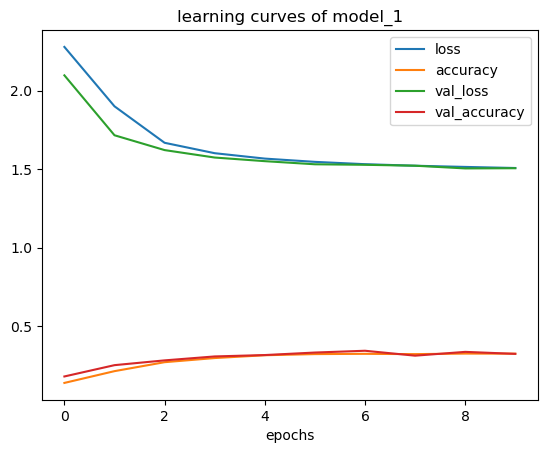

In [15]:

###If we do not specify columns to axis , the plot function will plot the lines against the index values of data frame
pd.DataFrame(history_1.history).plot(title = "learning curves of model_1", xlabel = "epochs")

In [17]:
###Lets normalize data and train
train_data.min(), train_data.max()

(0, 255)

In [18]:
train_data = train_data/255
test_data = test_data/255
###train and test must always be on same scale
train_data.min(), train_data.max(), test_data.min(), test_data.max()

(0.0, 1.0, 0.0, 1.0)

In [19]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])

In [20]:
history_2 = model_2.fit(train_data, train_labels, epochs = 10, validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 1.5117 - accuracy: 0.4035 - val_loss: 1.2794 - val_accuracy: 0.4476
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 1.1829 - accuracy: 0.4938 - val_loss: 1.1390 - val_accuracy: 0.5246
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 1.0664 - accuracy: 0.5489 - val_loss: 1.0416 - val_accuracy: 0.5769
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.9740 - accuracy: 0.6115 - val_loss: 0.9546 - val_accuracy: 0.6249
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.8984 - accuracy: 0.6441 - val_loss: 0.8999 - val_accuracy: 0.6447
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.8589 - accuracy: 0.6556 - val_loss: 0.9137 - val_accuracy: 0.6562
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8352 - accuracy: 0.6684 - val_loss: 0.8631 - val_ac

<Axes: title={'center': 'history of model-1'}, xlabel='epochs'>

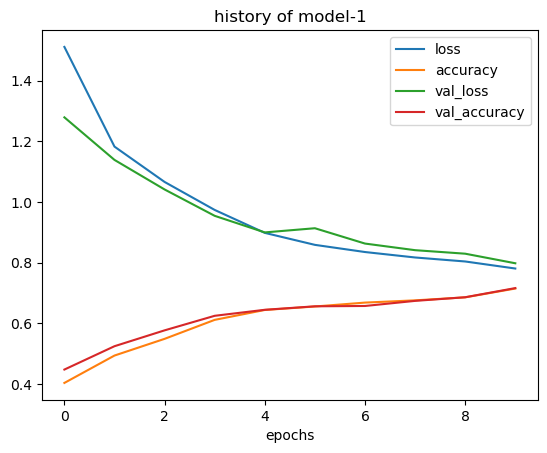

In [21]:
pd.DataFrame(history_2.history).plot(title = "history of model-1", xlabel = "epochs")

In [22]:
###Tuning the learning rate

In [23]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

In [25]:
history_3 = model_3.fit(train_data, train_labels, epochs = 40, validation_data = (test_data, test_labels), callbacks = [lr_schedular])

Epoch 1/40
1875/1875 [==============================] - 15s 7ms/step - loss: 1.1905 - accuracy: 0.5785 - val_loss: 0.8154 - val_accuracy: 0.7044 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7078 - accuracy: 0.7295 - val_loss: 0.6822 - val_accuracy: 0.7287 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6304 - accuracy: 0.7538 - val_loss: 0.6479 - val_accuracy: 0.7448 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6010 - accuracy: 0.7679 - val_loss: 0.6221 - val_accuracy: 0.7620 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5845 - accuracy: 0.7776 - val_loss: 0.6068 - val_accuracy: 0.7706 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5733 - accuracy: 0.7853 - val_loss: 0.6080 - val_accuracy: 0.7730 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================

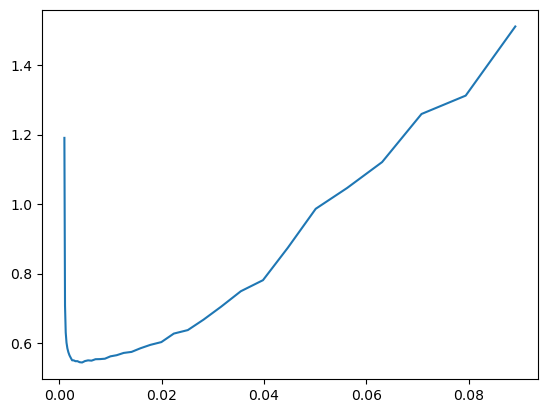

In [28]:
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.plot(lrs, history_3.history["loss"] )

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model_3, show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
